# Pymaceuticals Inc.
---
Purpose

The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Study Format

In this study, 249 mice who were identified with SCC tumors received treatment with a range of nine drug regimens and one placebo. The mouse population was 49% female and 51% male.  Over the course of 45 days, tumor development was observed and measured. 

### Analysis

Of the nine drug regimens tested, reduced tumor volumes were only observed with the Capomulin and Ramican drug regimens.  Tumor volumes increased for all other drug regimens as well as the placebo group.

Average tumor volume is correlated with mouse weight.  As the mouse weight increases, the average tumor volume increases.  

The Drug Regimen and Mouse weight data is confounded as the Capomulin and Ramican groups consisted of lower weight mice compared to the other test groups.  Additional testing will be required to identify the impact of drug regimen and/or mouse weight on tumor volume.


### Exclusions
One mouse (g989) was removed from the analysis of the Propriva Drug Regimen due to duplicate measurements taken at multiple timepoints.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (6 points)
mousestudy = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
mousestudy.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# #using initial dataframe
# nmice=mouse_metadata["Mouse ID"].count()
# print(nmice)
#using combined dataframe (2 points)
nmice2 = mousestudy["Mouse ID"].nunique()
nmice2


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. (6 points)
#visual check for duplicate mice
df = pd.DataFrame(mousestudy.groupby(["Mouse ID","Timepoint"]).size().reset_index(name=
'count').sort_values("count",ascending = False))
print(df.head(10))
#check for mice where count is >1 to get ids of duplicate mice
dupmice = df.loc[df['count'] > 1]["Mouse ID"].unique()
dupmice

     Mouse ID  Timepoint  count
590      g989         20      2
589      g989         15      2
588      g989         10      2
587      g989          5      2
586      g989          0      2
0        a203          0      1
1264     q633          0      1
1260     q610         20      1
1261     q610         25      1
1262     q610         30      1


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedup = mousestudy.loc[mousestudy['Mouse ID']=="g989"]
mousedup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (4 points)
cleanmouse = mousestudy.loc [mousestudy["Mouse ID"]!="g989"]
cleanmouse.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame. (2 pts)
ncleanmouse = cleanmouse["Mouse ID"].nunique()
ncleanmouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. (10 pts = 2 pts per calculated statistic)
# Assemble the resulting series into a single summary DataFrame.
meanTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).mean().rename("Mean Tumor Volume")
medianTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).median().rename('Median Tumor Volume')
varianceTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).var().rename('Tumor Volume Variance')
stdevTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).std().rename('Tumor Volume Std. Dev.')
semTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).sem().rename('Tumor Volume Std. Error')
# print(meanTV)
# print(medianTV)
# print(varianceTV)
# print(stdevTV)
# print(semTV)
# print(type(semTV))


summaryTV = pd.concat([meanTV,medianTV,varianceTV,stdevTV,semTV], axis = 1, join = 'outer')

# # # # # Display the DataFrame (5 pts)

summaryTV



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.  Pandas agg

aggTV = cleanmouse["Tumor Volume (mm3)"].groupby(cleanmouse["Drug Regimen"]).agg(['mean','median','var','std','sem'] )

#Add main column header for multiple column headings
#https://www.includehelp.com/python/how-to-add-main-column-header-for-multiple-column-headings.aspx
aggTV.columns=[["Tumor Volume (mm3)","Tumor Volume (mm3)","Tumor Volume (mm3)","Tumor Volume (mm3)","Tumor Volume (mm3)"],['mean','median','var','std','sem']]

# # # # # Display the DataFrame (not listed in requirements)
# print(type(aggTV))
aggTV


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total number of Timepoints for all mice tested')

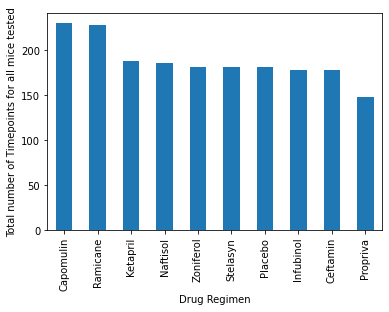

In [9]:
# Generate a bar plot showing the total number of TIMEPOINTS for all mice tested for each drug regimen using Pandas. (4.5 pts)
ntimesperdrug = cleanmouse["Mouse ID"].groupby(cleanmouse["Drug Regimen"]).count().sort_values(ascending = False)
# print(ntimesperdrug)
df = pd.DataFrame(ntimesperdrug)
# print(df)
barchart = df.plot(kind = "bar",legend=False)
barchart.set_ylabel('Total number of Timepoints for all mice tested')




Text(0, 0.5, 'Total number of Timepoints for all mice tested')

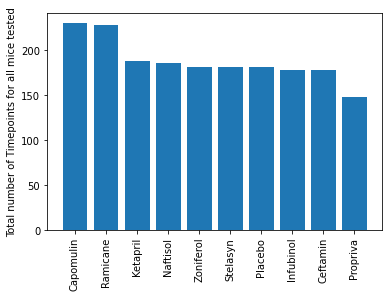

In [10]:
# Generate a bar plot showing the total number of TIMEPOINTS for all mice tested for each drug regimen using pyplot. (4.5 pts)

ntimesperdrug2 = cleanmouse["Mouse ID"].groupby(cleanmouse["Drug Regimen"]).count().sort_values(ascending = False)
# print(ntimesperdrug2)

prettybars=plt.bar(ntimesperdrug2.index,ntimesperdrug2)
plt.xticks(rotation = 90,ha='center')
plt.ylabel('Total number of Timepoints for all mice tested')



In [11]:
# print out the cleanmouse table for reference  CG
cleanmouse.head(1)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


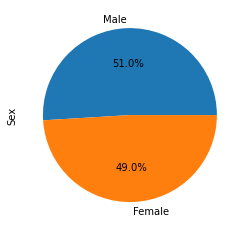

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas (3 pts)

gender = cleanmouse['Mouse ID'].groupby(cleanmouse["Sex"]).count().sort_values(ascending = False)
# print(gender)
genderdf = pd.DataFrame(gender)
genderdf.rename(columns = {'Mouse ID':'Sex'}, inplace=True)
# print(genderdf)

piechart = genderdf.plot.pie(y='Sex',legend=False,autopct='%1.1f%%')



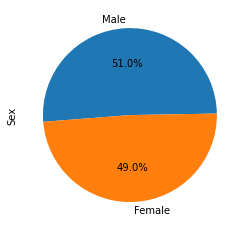

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot (3 pts)

# gender2 = cleanmouse['Mouse ID'].groupby(cleanmouse["Sex"]).count().sort_values(ascending = False)
# print(gender2)

prettypie = plt.pie(gender, labels=gender.index,autopct="%1.1f%%", shadow=False, startangle=1)
plt.ylabel('Sex')

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# print out the cleanmouse table for reference  CG
cleanmouse.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (5 pts)
# index reset (2 pts)
# max timepoint retrieved for each mouse (2 pts)
LastTimepoint = pd.DataFrame(cleanmouse['Timepoint'].groupby(cleanmouse["Mouse ID"]).max().rename("Timepoint")).reset_index()
LastTimepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#chrisnote - can merge on two columns in later versions of python

MouseMaxTV = pd.merge(LastTimepoint,cleanmouse, on='Mouse ID')
mmtv = MouseMaxTV[MouseMaxTV["Timepoint_x"]==MouseMaxTV["Timepoint_y"]]
mmtv = mmtv.rename(columns={'Timepoint_x':'Timepoint'})
mmtv = mmtv.drop('Timepoint_y',axis='columns')

mmtv


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,67.973419,2
19,a251,45,Infubinol,Female,21,25,65.525743,1
29,a262,45,Placebo,Female,17,29,70.717621,4
39,a275,45,Ceftamin,Female,20,28,62.999356,3
46,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
1839,z435,10,Propriva,Female,12,26,48.710661,0
1849,z578,45,Ramicane,Male,11,16,30.638696,0
1859,z581,45,Infubinol,Female,24,25,62.754451,3
1869,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels) (3 points)
fourtreats = ['Capomulin','Ceftamin','Infubinol','Ramicane']
fourtreats


['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [18]:
#create empty list to fill with tumor volume data (3 pts)

finalTV = []



In [19]:

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #create dataframe with only the fourtreats
fourmmtv = mmtv.loc[mmtv['Drug Regimen'].isin(fourtreats)]
fourmmtv

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,67.973419,2
19,a251,45,Infubinol,Female,21,25,65.525743,1
39,a275,45,Ceftamin,Female,20,28,62.999356,3
66,a411,45,Ramicane,Male,3,22,38.407618,1
76,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
1812,y769,45,Ceftamin,Female,6,27,68.594745,4
1822,y793,45,Capomulin,Male,17,17,31.896238,2
1832,y865,45,Ceftamin,Male,23,26,64.729837,3
1849,z578,45,Ramicane,Male,11,16,30.638696,0


In [22]:
### Create Tumor volume lists for each treatment

#treatments in fourtreats variable, fourmmtv is for four treatments max timepoint tumor volume
CATV = []
CETV = []
INTV = []
RATV = []

for row in fourmmtv.index:
    if fourmmtv['Drug Regimen'][row] == 'Capomulin':
        CATV.append(fourmmtv['Tumor Volume (mm3)'][row])
    elif fourmmtv['Drug Regimen'][row]== 'Ceftamin':
        CETV.append(fourmmtv['Tumor Volume (mm3)'][row])
    elif fourmmtv['Drug Regimen'][row] == 'Infubinol':
        INTV.append(fourmmtv['Tumor Volume (mm3)'][row])
    elif fourmmtv['Drug Regimen'][row] ==  'Ramicane':
        RATV.append(fourmmtv['Tumor Volume (mm3)'][row]) 


print(f'Capomulin tumor volume list is {CATV}')
print(f'Ceftamin tumor volume list is {CETV}')
print(f'Infubinol tumor volume list is {INTV}')
print(f'Ramicane tumor volume list is {RATV}')
type(CATV)


Capomulin tumor volume list is [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.125164399999996, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.896238399999998]
Ceftamin tumor volume list is [62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.784681799999994, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]
Infubinol tumor volume list is [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.0486076

list

In [24]:
#create dataframe of tumor volumes by drug regimen
newframedf=pd.DataFrame({"Capomulin":CATV,"Ceftamin":CETV,"Infubinol":INTV,"Ramicane":RATV})
newframedf

,Capomulin,Ceftamin,Infubinol,Ramicane
0,38.982878,62.999356,67.973419,38.407618
1,38.939633,45.000000,65.525743,43.047543
2,30.485985,56.057749,57.031862,38.810366
3,37.074024,55.742829,66.083066,32.978522
4,40.159220,48.722078,72.226731,38.342008
5,47.685963,47.784682,36.321346,33.397653
6,37.311846,61.849023,60.969711,37.311236
7,38.125164,68.923185,62.435404,40.659006
8,38.753265,67.748662,60.918767,29.128472
9,41.483008,57.918381,67.289621,33.562402


In [25]:
### IQR FOR EACH TREATMENT  using for loops

#create lists for outlier check
outca = []
outce = []
outin = []
outra = []

#check for capomulin outliers
caqt = newframedf['Capomulin'].quantile([.25,.5,.75])
calowq=caqt[0.25]
caupq = caqt[0.75]
caiqr = caupq-calowq
calb=calowq-(1.5*caiqr)
caub = caupq+(1.5*caiqr)

for i in range(len(CATV)):
    if CATV[i] > caub:
        outca.append(CATV[i])
    elif CATV[i] < calb:
        outca.append(CATV[i])

#check for ceftamin outliers
ceqt = newframedf['Ceftamin'].quantile([.25,.5,.75])
celowq=ceqt[0.25]
ceupq = ceqt[0.75]
ceiqr = ceupq-celowq
celb=celowq-(1.5*ceiqr)
ceub = ceupq+(1.5*ceiqr)

for i in range(len(CETV)):
    if CETV[i] > ceub:
        outce.append(CETV[i])
    elif CETV[i] < celb:
        outce.append(CETV[i])

#check for infubinol outliers
inqt = newframedf['Infubinol'].quantile([.25,.5,.75])
inlowq=inqt[0.25]
inupq = inqt[0.75]
iniqr = inupq-inlowq
inlb=inlowq-(1.5*iniqr)
inub = inupq+(1.5*iniqr)


for i in range(len(INTV)):
    if INTV[i] > inub:
        outin.append(INTV[i])
    elif INTV[i] < inlb:
        outin.append(INTV[i])

#Check for ramicane outliers
raqt = newframedf['Ramicane'].quantile([.25,.5,.75])
ralowq=raqt[0.25]
raupq = raqt[0.75]
raiqr = raupq-ralowq
ralb=ralowq-(1.5*raiqr)
raub = raupq+(1.5*raiqr)

for i in range(len(RATV)):
    if RATV[i] > raub:
        outra.append(RATV[i])
    elif RATV[i] < ralb:
        outra.append(RATV[i])
    
print(f"Capolin's potential outliers: {outca}")
print(f"Ceftamin's potential outliers: {outce}")
print(f"Infubinol's potential outliers: {outin}")
print(f"Ramicane's potential outliers: {outra}")

Capolin's potential outliers: []
Ceftamin's potential outliers: []
Infubinol's potential outliers: [36.321345799999996]
Ramicane's potential outliers: []


Drug Regimen
Capomulin    [38.98287774, 38.93963263, 30.48598484, 37.074...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ramicane     [38.407618299999996, 43.04754260000001, 38.810...
Name: Tumor Volume (mm3), dtype: object


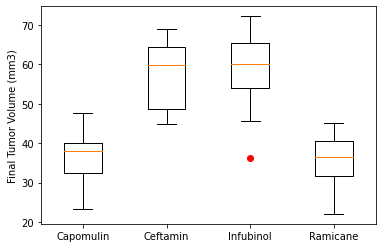

In [30]:
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #create dataframe with only the fourtreats
fourmmtv = mmtv.loc[mmtv['Drug Regimen'].isin(fourtreats)]
fourmmtv
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group using agg(list)
# A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group. (5 points)
#https://matplotlib.org/stable/api/markers_api.html

finalTV = fourmmtv.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(list)
print(finalTV)
type(finalTV)

fig1,ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(finalTV,0,'ro',labels = finalTV.index)
# ax1.boxplot(finalTV)
plt.show()

In [32]:
    # DO NOT USE
    # Determine IQR and lower/upper bounds using dataframes (first way I tried -)

quartiles = pd.DataFrame(fourmmtv.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25,.5,.75])).reset_index()
quartiles

qdf= quartiles.pivot(index = 'Drug Regimen',columns = 'level_1',values = 'Tumor Volume (mm3)').reset_index().rename(columns={0.25:'lower_quartile',0.50:'median',0.75:'upper_quartile'})
# #PIVOTS!!  https://www.w3resource.com/pandas/dataframe/dataframe-pivot.php

qdf['iqr']= qdf['upper_quartile']- qdf['lower_quartile']
qdf['lower_bound'] = qdf['lower_quartile']-(1.5*qdf['iqr'])
qdf['upper_bound'] = qdf['upper_quartile']-(1.5*qdf['iqr'])
qdf['drugs'] = fourtreats
qdf

checkoutca = []
checkoutce = []
checkoutin = []
checkoutra = []

xcaub = float(qdf.loc[qdf['drugs']=='Capomulin']['upper_bound'])
xcalb = float(qdf.loc[qdf['drugs']=='Capomulin']['lower_bound'])

print(xcaub)

print(xcalb)
type(xcalb)

## kept running into indentation errors
# for i in range(len(CATV)):
#     if CATV[i] > xcaub:
#         checkoutca.append(CATV[i])
#     elif CATV[i] < xcalb:
#         checkoutca.append(CATV[i])

# for i in range(len(CETV)):
#     if CETV[i] > ceub:
#         outce.append(CETV[i])
#     elif CETV[i] < celb:
#         outce.append(CETV[i])

# for i in range(len(INTV)):
#     if INTV[i] > inub:
#         outin.append(INTV[i])
#     elif INTV[i] < inlb:
#         outin.append(INTV[i])

# for i in range(len(RATV)):
#     if RATV[i] > raub:
#         outra.append(RATV[i])
#     elif RATV[i] < ralb:
#         outra.append(RATV[i])


28.486425109999995
20.70456164999999


float

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

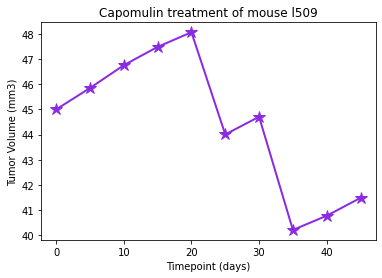

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (5 pts)
#https://matplotlib.org/stable/api/markers_api.html
#https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

om = cleanmouse[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
om
om2 = om.loc[(om['Drug Regimen']=='Capomulin')]
om2
om3 = om2.loc[(om2['Mouse ID'] == 'l509')]
om3

plt.plot(om3['Timepoint'],om3['Tumor Volume (mm3)'], color = 'blueviolet',marker = '*', linestyle = 'solid',linewidth = 2, markersize = 12)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

In [33]:
# print out the cleanmouse table for reference  CG
cleanmouse.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

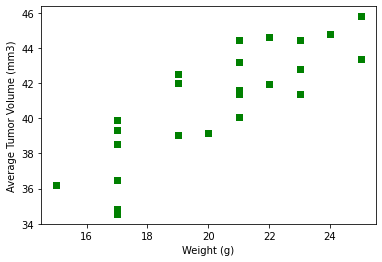

In [ ]:
#A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen. (5 points)
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#create capomulin regimen dataframe
capo = cleanmouse.loc[cleanmouse['Drug Regimen']=='Capomulin']
capo
# group by mouse id to get average tumor volume by mouse
mousewt = pd.DataFrame(capo['Tumor Volume (mm3)'].groupby(capo['Mouse ID']).mean().reset_index())
mousewt
#combine with original dataframe to get mouse weight and average tumor volume in same dataframe
combo = pd.merge(cleanmouse,mousewt,on="Mouse ID")
combo
#scatterplot fun
plt.scatter(combo['Weight (g)'],combo['Tumor Volume (mm3)_y'],color = 'green', marker = 's')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

For the Capomulin regimen, the correlation between mouse weight and the average tumor volume is 0.83 
The linear regression model is:  Average Tumor volume (mm3) = 0.96 * Weight(g) + 21.49 


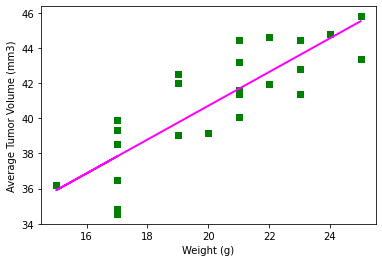

In [ ]:
# Calculate the correlation coefficient and linear regression model (10 points)
# for mouse weight and average tumor volume for the Capomulin regimen

mslope,mint,mr,mp,mstderr = st.linregress(combo['Weight (g)'],combo['Tumor Volume (mm3)_y'])
mfit = mslope*(combo['Weight (g)']) + mint

print(f'For the Capomulin regimen, the correlation between mouse weight and the average tumor volume is {round(mr,2)} ')

print(f'The linear regression model is:  Average Tumor volume (mm3) = {round(mslope,2)} * Weight(g) + {round(mint,2)} ')
plt.scatter(combo['Weight (g)'],combo['Tumor Volume (mm3)_y'],color = 'green', marker = 's')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(combo['Weight (g)'],mfit, color = 'magenta', linewidth = 2)
plt.show()



Drug Regimen
Capomulin    [38.98287774, 38.93963263, 30.48598484, 37.074...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ketapril     [49.78341894, 58.04656941, 62.17570465, 65.415...
Naftisol     [74.99776443, 73.05136339, 63.1056963, 55.1389...
Placebo      [70.71762058, 72.25596306, 65.81516535, 69.042...
Propriva     [62.19141437, 64.18322918, 61.77496268, 70.492...
Ramicane     [38.407618299999996, 43.04754260000001, 38.810...
Stelasyn     [63.44068627, 60.12201052, 62.76509317, 72.555...
Zoniferol    [66.79415599, 60.41370908, 55.74514628, 67.942...
Name: Tumor Volume (mm3), dtype: object


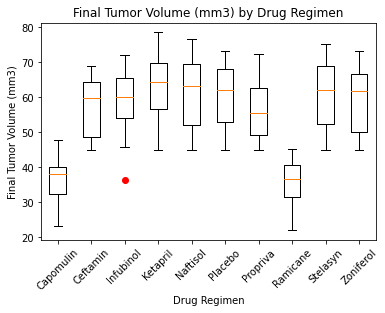

In [45]:
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #create dataframe with only the fourtreats
# fourmmtv = mmtv.loc[mmtv['Drug Regimen'].isin(fourtreats)]
# fourmmtv
# # Generate a box plot that shows the distrubution of the tumor volume for each treatment group using agg(list)
# A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group. (5 points)
#https://matplotlib.org/stable/api/markers_api.html

alltreatTV = mmtv.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(list)
print(alltreatTV)
type(alltreatTV)

fig1,ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volume (mm3) by Drug Regimen')
ax1.boxplot(alltreatTV,0,'ro',labels = alltreatTV.index)
plt.xticks(rotation= 45)
# ax1.boxplot(finalTV)
plt.show()